# Machine Learning Model Evaluation Measures
> Foundations of Machine Learning CS5590  week 2

- toc: true 
- badges: true
- comments: true
- categories: [Foundations of Machine Learning ]
- author: Abhishek Kumar Dubey
- image: images/CS5590_images/chrome_CNeo323E9V.png

## Evaluation Measures 
- Classification
    - It is a measure of being  right/wrong,0-1, eg:  hinge loss, cross entropy loss 
- Regression loss
    - It is a measure if how close we are to target, eg:  MEA, MES
- Ranking/search
    - It is a measure of top K search
- Clustering 
    - How well we have described the data ( not straight forward)

## Is accuracy adequate

Accuracy may not not be useful in cases where:
- There is a large class skew.
- There are differential misclassification cost, say getting a positive wrong costs more than getting a negative wrong.
- we are most interested in a subset of high confidence predictions. 

## Classification Error

![](../images/CS5590_images/chrome_CNeo323E9V.png)


> Tip: <br><br> Precision = How many retrieved items as relevant? <br> Recall = How many relevant items are retrieved?

> Tip: <br><br>  sensitivity = Probability of positive test given a patient has a disease.<br> Specificity = Probability of a negative test given a patient is well.<br>Specificity = 1 - False Alarm<br> 

## Utility and cost
- Detection Cost:
    - cost = $C_{\mathrm{FP}} \times \mathrm{FP}+C_{\mathrm{FN}} \times \mathrm{FN}$
- Fmeasure
    - $F1=\frac{2\times \left(\mathrm{Recall}\times \mathrm{Precision}\right)}{\mathrm{Recall}+\mathrm{Precision}}$

## ROC curve
- Receiver Operative Curve
- Plot between True positive rate on y axis and False positive rate on x axis 
- AUC : Area under the curve, higher the area, better the performance

![](../images/CS5590_images/MATLAB_eYMZjl3LEJ.png)

# Precision Recall Curve
- Plot between Precision on y axis and recall (TPR) on x axis. It is used for class imbalanced dataset mostly, It is also used when we can not calculate True Negative. 

# A nice way to define precision recall etc.
Consider $Y$ as `true label` and $\hat{Y}$ as `predicted label`. 
- precision  $=P\left(Y=1|\;\hat{Y} =1\right)$
- Recall (TPR)   $=P\left(\hat{Y} =1|\;Y=1\right)$
- False positive Rate (FPR) $=P\left(\hat{Y} =1|\;Y=0\right)$
- True Negative Rate (TNR)= $=P\left(\hat{Y} =0|\;Y=0\right)$
<br><br>
> Note:<br><br> Notice that TPR and FPR which makes ROC curve  is conditioned on the  `true value`, and precision which is used in PR curve is conditioned on `predicted label`. This is the reason, PR curve is used for class imbalanced dataset, or where positive class is more interesting then negative class.<br> [If  question is: _"How meaningful is a positive result from my classifier given the baseline probabilities of my problem?"_, use a PR curve. If  question is, _"How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?"_, go with a ROC curve.](https://stats.stackexchange.com/questions/7207/roc-vs-precision-and-recall-curves)

# ROC curve vs PR curve

Consider a dataset having 100 positive cases and 10,000 negative cases. Now consider 2 classifiers $A$ and $B$. $A$ predicts 9 as true positive, 40 as false positive whereas $B$ predicts 9 as true positive 1000 as false positive.<br>
We can observe that as both the classifier predicts 9 out of 10 as true positive so both has same recall value, also FPR is small(as it can be seen in below picture), so the ROC curve which is drawn between recall (TPR) and FPR, will not differentiate among the two classifier. <br>
But PR curve which is drawn between precision and recall, will look totally different here as both has different precision.

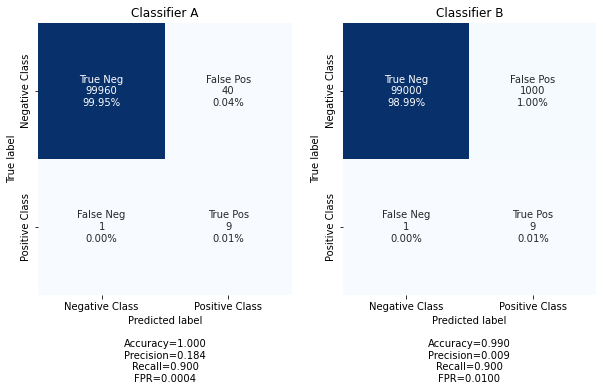

In [57]:
#collapse-hide
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_conf_matrix_labels(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(cf_matrix.shape[0],cf_matrix.shape[1])
    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    fpr    = cf_matrix[0,1] / sum(cf_matrix[0,:])
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nFPR={:0.4f}".format(
                accuracy,precision,recall,fpr)    
    return labels,stats_text


YTrue = np.hstack([np.ones(10),np.zeros(100000)]) # data with 100 positive and 10,000 negative cases
yPredA = np.hstack([np.ones(9),np.zeros(1),np.ones(40),np.zeros(99960)]) # A predicts 9 True positive, 40 False  Positive,
yPredB = np.hstack([np.ones(9),np.zeros(1),np.ones(1000),np.zeros(99000)]) # B predicts 9 True positive, 1000 False positive
cf_matrixA = confusion_matrix(YTrue, yPredA)
cf_matrixB = confusion_matrix(YTrue, yPredB)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
axis_labels = ['Negative Class','Positive Class']
labels,stats_text=get_conf_matrix_labels(cf_matrixA)
sns.heatmap(cf_matrixA, annot=labels, fmt='', cmap='Blues',ax=ax[0],cbar=False,xticklabels=axis_labels, yticklabels=axis_labels)
ax[0].set_title('Classifier A')
ax[0].set_xlabel('Predicted label'+stats_text)
ax[0].set_ylabel('True label')
labels,stats_text=get_conf_matrix_labels(cf_matrixB)
sns.heatmap(cf_matrixB, annot=labels, fmt='', cmap='Blues',ax=ax[1],cbar=False,xticklabels=axis_labels, yticklabels=axis_labels)
ax[1].set_title('Classifier B')
ax[1].set_xlabel('Predicted label'+stats_text)
_=ax[1].set_ylabel('True label')

Accuracy also is not a good measure in above case. As both the classifier has similar accuracy. 

# Other performance measures
- Kullback-Leibler Diverfence : $D_{\mathrm{KL}} \left(P\|Q\right)=\sum_i P\left(i\right)\log \frac{P\left(i\right)}{Q\left(i\right)}$
- Gini Statistic : $2\times \mathrm{AUC}-1$
- F1 score: $\frac{2\times \left(\mathrm{Recall}\times \mathrm{Precision}\right)}{\mathrm{Recall}+\mathrm{Precision}}$
- Akaike Information Criterion (AIC): $2k-2\ln \left(L\right)$, here  $k$ is number of model parameters, L is max value of the Likelihood  function for the model

# Important points
- Randomization of data is essential so that held-aside test data can be really representative of new data. 
- Test set should never be used in any way for normalization, hyper parameter tuning etc.
- Any preprocessing done over entire data set ( feature selection, parameter tuning, threshold selection ) must not use labels from test set. 

# K-Nearest Neighbors

## basic idea
- If it walks like a duck, quacks like a duck , then it's probably a duck.
- If data points are represented well then KNN works well.
- choosing K is important, if K is too small then it becomes sensitive to noise point. If k is too large, neighborhood may incudes points from other class.
- Euclidean distance between two instance $d\left(X_i ,X_j \right)=\sqrt{\sum_{r=1}^n {\left(a_r \left(X_i \right)-a_{r\left(X_j \right)} \right)}^2 }$ here $a_i \left(X\right)\;$ denotes features.
- In case of continuous valued target function, Mean value of K nearest training examples is taken

## How to determinke K
- experiment with different value of K starting form 1 on test set to validate the error, in case of binary classification use odd number for k to avoid ties.<br>

KNN is a transductive method, there is no training involved , it is refereed as Lazy learning, Learning is just storing all the training instances <br> 
Similar Keywords: KNN, Memory Based Reasoning, Example Based Reasoning, Instance Based Learning, Case Based Reasoning, Lazy Learning<br>
Voronoi Diagram: Decision surface formed by the training Examples for 1 nearest neighbors classifier<br> 


## Improvements
- Distance weighted Nearest Neighbors
- Scaling (normalization) attributes for fair computation fo distances 
- Measure "closeness" differently
- Finding "close" example in large training set quickly , eg Efficient memory indexing using kd-tree

## Pros
- Highly effective transductive inference method for noisy training data and complex target functions.
- Target function for a whole space may be described as a combinations of less complex local  approximations 
- Trains very fast (Lazy Learner)

## Cons
- Curse of dimensionality 
- Storage: all training example are saved in memory 
- slow at query time, can be overcome by  pre sorting and indexing training samples.

## Convergence of 1-NN
$P\left(\mathrm{KNNError}\right)=2\left(\mathrm{Bayes}\;\mathrm{Optimal}\;\mathrm{Error}\;\mathrm{Rate}\right)$ , Probability of K NN error is at most twice the bayes optimal error, bayes optimal error is best(least) error we can get using machine learning <br>
It is Possible to show that: as the size of training data set approaches infinity, the one nearest neighbor classifier guarantees an error rate of no worse than twice the bayes error rate ( the minimum achievable error rate given the distribution of the data).

## Density Estimation using KNN
Non parametric Density Estimation using KNN. <br>
nstead of fixing bin width h and counting the mumber of instances, fix the instances(neighbors) k and check bin width $\hat{p} \left(X\right)=\frac{k}{2{\mathrm{Nd}}_k \left(X\right)}$ here $d_k \left(X\right)$ is the $k_{\mathrm{th}}$ closest distance to to $X$ , This is also known as __Parzen density estimation__.